In [1]:
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel(r"C:\Users\saath\Desktop\final_dataset.xlsx")

In [10]:
dataset = pd.get_dummies(dataset)
dataset['salary'] = dataset['salary'].astype(int)
dataset = dataset.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [11]:
dataset.head(5)

,salary,Experience,title_CLOUD ENGINEER,title_IT Project Manager I,title_IT Project Manager III,title_SOFTWARE DEVELOPER I,title_SOFTWARE DEVELOPER III,title_Senior Computer Security Systems Specialist,title_Senior Data Scientist,title_Senior Security Analyst,...,posted_date_9/7/18,posted_date_9/7/19,posted_date_9/7/20,posted_date_9/8/17,posted_date_9/8/19,posted_date_9/8/20,posted_date_9/9/17,posted_date_9/9/18,posted_date_9/9/19,posted_date_9/9/20
0,92500,11,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57500,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86410,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,135000,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,114400,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\saath\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [27]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [28]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,129000.0,125071.420062
1,64500.0,68789.506743
2,57500.0,61388.215440
3,159998.0,139031.673053
4,70000.0,73900.585660
...,...,...
995,144560.0,142221.264396
996,100000.0,103336.830954
997,74000.0,77854.645330
998,150000.0,129713.341187


In [37]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt 

mse = mean_squared_error(sc_y.inverse_transform(y_test.reshape(-1)), y_pred)
rmse = sqrt(mse)
rmse

16751.580136130517

In [34]:
from sklearn.metrics import r2_score
r2_score(sc_y.inverse_transform(y_test.reshape(-1)), y_pred)

0.8080394525716745

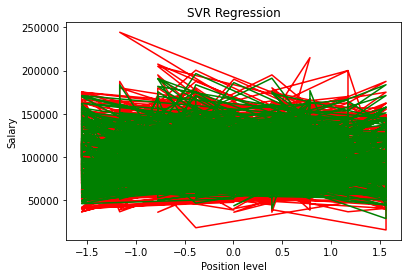

In [47]:
plt.plot(X_test[:,0], sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.plot(X_test[:,0], y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()